In [4]:
# python imports
import numpy as np
import pandas as pd
import rpy2
import requests
from io import StringIO

# R imports
%reload_ext rpy2.ipython
%R require(ggplot2)

In [2]:
url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'
r = requests.get(url, allow_redirects=True)
df = pd.read_csv(StringIO(r.text))
top_gun_states = df.groupby(['state']).sum().sort_values(by='totals', ascending=False).index[0:6]
df = df[df['state'].isin(top_gun_states)]

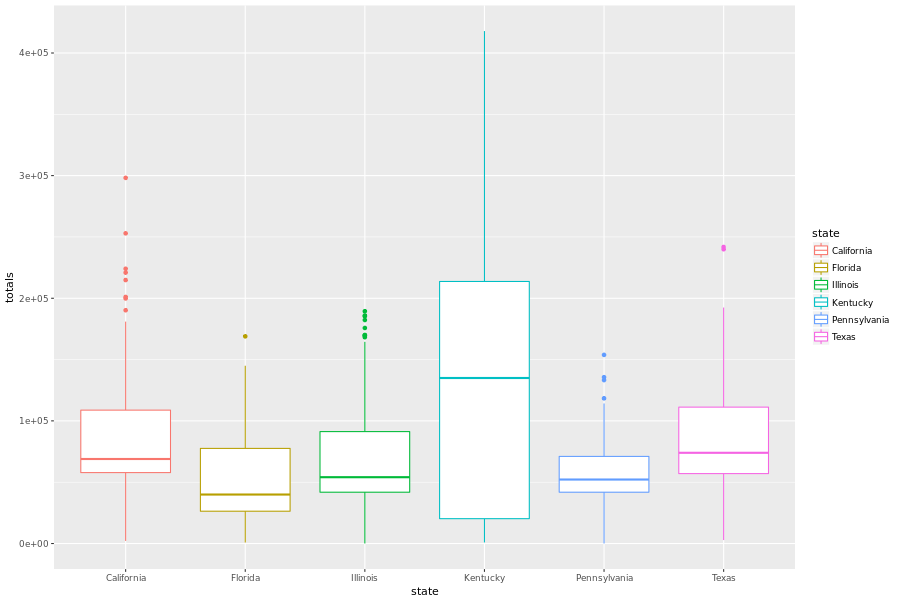

In [3]:
%%R -i df -w 900 -h 600 -u px
ggplot(df, aes(x=state, y=totals)) + geom_boxplot(aes(color=state))

In [ ]:
# to save high res versions use: %%R ggsave('filename.png', plot = last_plot(), dpi = 1000) 